# Quantum classification trainability and Circuit structure

In [2]:
from pennylane import numpy as np
from sklearn.model_selection import train_test_split

import sys
sys.path.append('/Users/kensuke/github/physics/qc/quantum-classification/')
from src.quantum_classification.quantum_classification import *

In this notebook, we see the dependence of trainability of the QML classifier on the circuit structure and the cost function.

The circuit structure is defined by two parts: the embedding part, the ansatz part.
- embedding part: the embedding circuit to encode input data into the quantum circuit.
    There are 3 types of embedding circuits:
    - Tensor Product Embedding (TPE): the embedding circuit is the tensor product of rotation gates (Input data as angles).
    - Hardware Efficient Embedding (HEE): the embedding circuit is the tensor product of rotation gates (Input data as angles) followed by controlled-NOT gates over adjacent qubits.
    - Classically Hard Embedding (CHE): the embedding circuit that is hard to simulate on classically.
- ansatz part: the parametrized circuit to learn the training dataset.
    There are 3 types of ansatz circuits:
    - Tensor Product Ansatz (TPA): the ansatz circuit is the tensor product of rotation gates (Input data as angles).
    - Hardware Efficient Ansatz (HEA): the ansatz circuit is the tensor product of rotation gates (Input data as angles) followed by controlled-NOT gates over adjacent qubits.
    - Strongly Entangling Ansatz (SEA): the ansatz circuit that is strongly entangled.

On `HEE` and `CHE`, refer to [`Subtleties in the trainability of quantum machine learning models`](https://arxiv.org/abs/2110.14753) for more details.

On `SEA`, refer to PennyLnae page: [embedding and ansatz](https://pennylane.readthedocs.io/en/stable/introduction/templates.html)

## Cost vs Circuit structure (use iris dataset with 2 features and 2 labels)

In [5]:
from quantum_classification.circuit_structure_effect_on_trainability import *

data = np.loadtxt("../data/iris_classes1and2_scaled.txt")
X = data[:,:2] # use first 2 features
Y = data[:,-1] # last column is the class
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [3]:
print(X.shape, Y.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(100, 2) (100,)
(80, 2) (80,)
(20, 2) (20,)


In [19]:
nqubits = X.shape[1]; embedding_nlayers = 1; ansatz_nlayers = 2; cost_type = 'LOG'
embedding_list = ['TPE', 'HEE', 'CHE', 'APE']
ansatz_list = ['TPA', 'HEA', 'SEA']
draw = False; shots = None; stepsize = 0.3; steps = 50

optimized_cost_acc_iris, cost_all_iris = train_each_circuit(x_train, y_train, x_test, y_test, nqubits, embedding_nlayers, ansatz_nlayers, embedding_list, ansatz_list, cost_type, draw, shots, stepsize, steps)

TPE, TPA
TPE, HEA
TPE, SEA
HEE, TPA
HEE, HEA
HEE, SEA
CHE, TPA
CHE, HEA
CHE, SEA
APE, TPA
APE, HEA
APE, SEA


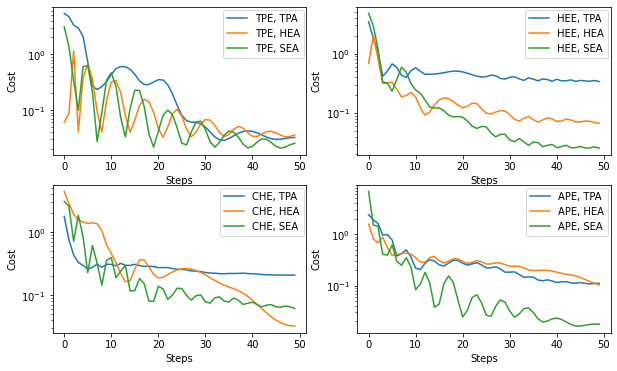

In [20]:
plot_cost(cost_all_iris)

In [21]:
sort_cost_acc(cost_type, optimized_cost_acc_iris)

LOG
embedding_type: APE, ansatz_type: SEA: cost 0.017656670932380075
embedding_type: TPE, ansatz_type: SEA: cost 0.025400848904150473
embedding_type: HEE, ansatz_type: SEA: cost 0.025468286138240863
embedding_type: TPE, ansatz_type: TPA: cost 0.03226962625770859
embedding_type: CHE, ansatz_type: HEA: cost 0.032270301083135014
embedding_type: TPE, ansatz_type: HEA: cost 0.03594380430480563
embedding_type: CHE, ansatz_type: SEA: cost 0.06122273025331888
embedding_type: HEE, ansatz_type: HEA: cost 0.06726885058694734
embedding_type: APE, ansatz_type: HEA: cost 0.10248539393776128
embedding_type: APE, ansatz_type: TPA: cost 0.11031492761953758
embedding_type: CHE, ansatz_type: TPA: cost 0.20824491202779996
embedding_type: HEE, ansatz_type: TPA: cost 0.3380731585455802
---------------------------------------------------------------
embedding_type: TPE, ansatz_type: SEA: accuracy 1.0
embedding_type: HEE, ansatz_type: SEA: accuracy 1.0
embedding_type: CHE, ansatz_type: TPA: accuracy 1.0
embed

## Cost vs the number of layers of embedding

In [4]:
data = np.loadtxt("data/iris_classes1and2_scaled.txt")
X = data[:,:2] # use first 2 features out of 4 (100,2)
Y = data[:,-1] # last column is the class      (100,1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [5]:
nqubits = 2; embedding_nlayers_list = [1,2,3,4,5,6]; ansatz_nlayers = 2; embedding_type = 'TPE'; ansatz_type = 'TPA'; cost_type = 'LOG'
draw = True; shots = None; stepsize = 0.3; steps = 100

optimized_cost_list = []
optimized_acc_list  = []
for embedding_nlayers in embedding_nlayers_list:
    cost_embedding_layers = QuantumClassifier(x_train, y_train, nqubits, embedding_nlayers, ansatz_nlayers, embedding_type, ansatz_type, cost_type, shots, stepsize, steps)
    cost_embedding_layers.optimize()
    optimized_cost_list.append(cost_embedding_layers.cost_list[-1])
    optimized_acc_list.append(cost_embedding_layers.accuracy(x_test, y_test))

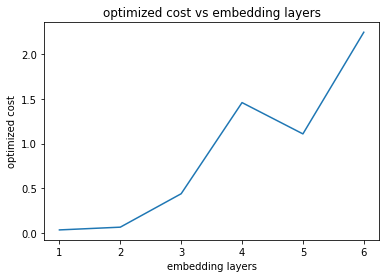

In [6]:
plt.plot(embedding_nlayers_list, optimized_cost_list)
plt.xlabel('embedding layers')
plt.ylabel('optimized cost')
plt.title('optimized cost vs embedding layers')
plt.show()

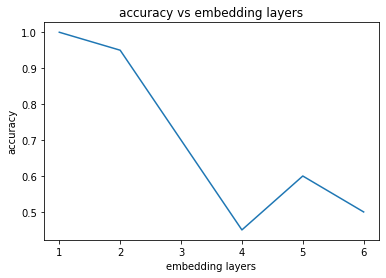

In [7]:
plt.plot(embedding_nlayers_list, optimized_acc_list)
plt.xlabel('embedding layers')
plt.ylabel('accuracy')
plt.title('accuracy vs embedding layers')
plt.show()

### -> many embedding layers make it harder to train the model